### 实时数据探索性分析
#### 世界各国实时数据探索性分析

我们首先读入数据，将列名英文改为中文。接着，查看数据的基本信息并进行缺失值处理。此外，我们还将新增病死率一列，并将国家设置为索引。数据预处理之后我们将查看世界当前累计确诊人数前十名的国家，并绘制累计确诊、累计死亡和病死率的水平条形图来分析各国疫情状况

In [1]:
import pandas as pd

# 读取数据
today_world = pd.read_csv("./today_world_2020_07_01.csv")

In [2]:
# 查看世界各国实时数据 
today_world.head()

,id,lastUpdateTime,name,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input
0,9577772,2020-07-01 01:08:30,突尼斯,1174,0,1031,50,0,0.0,2.0,NaN,2.0,0.0,NaN,NaN,NaN
1,9507896,2020-07-01 00:03:26,塞尔维亚,14564,0,12662,277,0,0.0,276.0,NaN,0.0,0.0,NaN,NaN,NaN
2,0,2020-07-01 15:28:52,中国,85232,0,80071,4648,0,1918.0,5.0,NaN,17.0,0.0,NaN,-12.0,0.0
3,1,2020-06-15 07:16:58,日本,18241,0,16298,940,0,0.0,75.0,NaN,63.0,0.0,NaN,NaN,0.0
4,2,2020-07-01 15:48:53,泰国,3173,0,3059,58,0,0.0,2.0,NaN,3.0,0.0,NaN,NaN,NaN


数据表各列名称为英文不便于观察，我们将列名修改为中文。首先，创建中英文对照的列名字典，使用`rename()`函数修改列名:

In [5]:
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊','today_input':'当日境外输入',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症','total_input':'累计境外输入'}

# 更改列名
today_world.rename(columns=name_dict,inplace=True)    # inplace参数判断是否在原数据上进行修改

today_world.head(3)

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
0,9577772,2020-07-01 01:08:30,突尼斯,1174,0,1031,50,0,0.0,2.0,NaN,2.0,0.0,NaN,NaN,NaN
1,9507896,2020-07-01 00:03:26,塞尔维亚,14564,0,12662,277,0,0.0,276.0,NaN,0.0,0.0,NaN,NaN,NaN
2,0,2020-07-01 15:28:52,中国,85232,0,80071,4648,0,1918.0,5.0,NaN,17.0,0.0,NaN,-12.0,0.0


当我们拿到一份数据的时候，首先需要观察一下数据的基本信息和特征的统计信息。我们可以使用`info()`查看数据的基本信息：

In [6]:
# 查看数据基本信息
today_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      207 non-null    object 
 1   更新时间    207 non-null    object 
 2   名称      207 non-null    object 
 3   累计确诊    207 non-null    int64  
 4   累计疑似    207 non-null    int64  
 5   累计治愈    207 non-null    int64  
 6   累计死亡    207 non-null    int64  
 7   累计重症    207 non-null    int64  
 8   累计境外输入  170 non-null    float64
 9   当日新增确诊  160 non-null    float64
 10  当日新增疑似  13 non-null     float64
 11  当日新增治愈  160 non-null    float64
 12  当日新增死亡  160 non-null    float64
 13  当日新增重症  13 non-null     float64
 14  当日现存确诊  1 non-null      float64
 15  当日境外输入  7 non-null      float64
dtypes: float64(8), int64(5), object(3)
memory usage: 26.0+ KB


查看数据的统计信息可以使用`describe()`函数：

In [7]:
# 默认只计算数值型特征的统计信息
today_world.describe()

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
count,2.070000e+02,207.0,2.070000e+02,207.000000,207.0,170.000000,160.000000,13.0,160.000000,160.000000,13.0,1.0,7.0
mean,5.135445e+04,0.0,2.822262e+04,2484.927536,0.0,11.282353,1092.018750,0.0,743.718750,29.468750,0.0,-12.0,0.0
std,2.255662e+05,0.0,1.086981e+05,11215.932184,0.0,147.103885,4796.381447,0.0,3467.183819,135.706209,0.0,NaN,0.0
min,1.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-12.0,0.0
25%,3.270000e+02,0.0,1.795000e+02,8.000000,0.0,0.000000,4.000000,0.0,0.000000,0.000000,0.0,-12.0,0.0
50%,2.221000e+03,0.0,1.370000e+03,50.000000,0.0,0.000000,53.000000,0.0,0.500000,0.000000,0.0,-12.0,0.0
75%,1.889950e+04,0.0,1.016650e+04,373.000000,0.0,0.000000,402.250000,0.0,91.250000,3.000000,0.0,-12.0,0.0
max,2.727853e+06,0.0,1.143334e+06,130122.000000,0.0,1918.000000,46042.000000,0.0,30507.000000,1280.000000,0.0,-12.0,0.0


数据中当日新增确诊、疑似、治愈、死亡、重症和当日现存确诊中存在大量缺失值。为了便于观察，我们使用`isnull()`函数查看缺失值，并结合`sum()`函数计算缺失值比例。

In [8]:
# 计算缺失值比例
today_world_nan = today_world.isnull().sum()/len(today_world)

# 转变为百分数
today_world_nan.apply(lambda x: format(x, '.1%')) 

编号         0.0%
更新时间       0.0%
名称         0.0%
累计确诊       0.0%
累计疑似       0.0%
累计治愈       0.0%
累计死亡       0.0%
累计重症       0.0%
累计境外输入    17.9%
当日新增确诊    22.7%
当日新增疑似    93.7%
当日新增治愈    22.7%
当日新增死亡    22.7%
当日新增重症    93.7%
当日现存确诊    99.5%
当日境外输入    96.6%
dtype: object

我们发现当日新增相关数据缺失值较多，这主要由于采集数据的当天一些国家没有更新数据，因此我们将不再对其进行分析。当日现存确诊一列虽然全部为空，但该缺失值可以通过已有数据直接计算，公式为：  

$$当日现存确诊=累计确诊-累计治愈-累计死亡$$

In [9]:
# 缺失值处理
today_world['当日现存确诊'] = today_world['累计确诊']-today_world['累计治愈']-today_world['累计死亡']

除了我们数据中提供的这些特征，病死率也是一个非常重要的特征，能够反映疾病的严重程度以及一个地区的医疗水平。接下来，我们来看看截止数据采集当天，各国的病死率情况。病死率的计算公式为：  

$$病死率=累计死亡\div累计确诊$$

In [10]:
# 计算病死率,且保留两位小数
today_world['病死率'] = (today_world['累计死亡']/today_world['累计确诊']).apply(lambda x: format(x, '.2f')) 

# 将病死率数据类型转换为float
today_world['病死率'] = today_world['病死率'].astype('float')

# 根据病死率降序排序
today_world.sort_values('病死率',ascending=False,inplace=True)

# 显示病死率前十国家
today_world.head(10)

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入,病死率
168,95200,2020-07-01 02:23:27,也门,1158,0,488,312,0,0.0,30.0,NaN,56.0,8.0,NaN,358,NaN,0.27
144,95287,2020-06-15 14:48:56,圣马丁岛,77,0,61,15,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.19
180,954332,2020-07-01 00:03:26,比利时,61427,0,16984,9747,0,0.0,66.0,NaN,0.0,0.0,NaN,34696,NaN,0.16
157,10,2020-07-01 04:03:33,法国,202063,0,76399,29846,0,0.0,541.0,NaN,275.0,30.0,NaN,95818,NaN,0.15
63,9522222,2020-07-01 00:03:26,匈牙利,4155,0,2692,585,0,0.0,10.0,NaN,0.0,0.0,NaN,878,NaN,0.14
162,15,2020-07-01 00:28:29,意大利,240578,0,190248,34767,0,0.0,142.0,NaN,1052.0,23.0,NaN,15563,NaN,0.14
161,14,2020-07-01 16:08:54,英国,314161,0,1370,43815,0,0.0,691.0,NaN,2.0,155.0,NaN,268976,NaN,0.14
16,828,2020-06-09 19:59:04,毛利亚尼亚,16,0,6,2,0,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,0.12
70,95120,2020-07-01 00:03:26,荷兰,50483,0,186,6132,0,0.0,52.0,NaN,0.0,0.0,NaN,44165,NaN,0.12
197,96745,2020-07-01 11:28:47,墨西哥,226089,0,174538,27769,0,0.0,5432.0,NaN,4391.0,648.0,NaN,23782,NaN,0.12


排名第一的国家也门病死率高达0.27，但从表中可知，该国累计确诊人数只有1158例。可见，病死率应结合累计确诊人数一起查看。

为了方便查询特定国家的数据，我们使用`set_index()`函数将国家设置为索引：

In [11]:
# 将国家名称设为索引
today_world.set_index('名称',inplace=True)

today_world.head(3)

,编号,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入,病死率
名称,,,,,,,,,,,,,,,,
也门,95200,2020-07-01 02:23:27,1158,0,488,312,0,0.0,30.0,NaN,56.0,8.0,NaN,358,NaN,0.27
圣马丁岛,95287,2020-06-15 14:48:56,77,0,61,15,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.19
比利时,954332,2020-07-01 00:03:26,61427,0,16984,9747,0,0.0,66.0,NaN,0.0,0.0,NaN,34696,NaN,0.16


In [12]:
today_world.loc['中国']    #可以通过传入列表获取多个国家的数据

编号                          0
更新时间      2020-07-01 15:28:52
累计确诊                    85232
累计疑似                        0
累计治愈                    80071
累计死亡                     4648
累计重症                        0
累计境外输入                   1918
当日新增确诊                      5
当日新增疑似                    NaN
当日新增治愈                     17
当日新增死亡                      0
当日新增重症                    NaN
当日现存确诊                    513
当日境外输入                      0
病死率                      0.05
Name: 中国, dtype: object

#### 当前累计确诊人数top10国家

接下来，让我们使用`sort_values()`函数根据累计确诊人数进行排序，找到确诊人数前十国家的累计确诊、累计死亡、病死率三列数据：

In [13]:
# 查看当前累计确诊人数前十国家
world_top10 = today_world.sort_values(['累计确诊'],ascending=False)[:10]

world_top10 = world_top10[['累计确诊','累计死亡','病死率']]

world_top10

,累计确诊,累计死亡,病死率
名称,,,
美国,2727853,130122,0.05
巴西,1402041,59594,0.04
俄罗斯,653479,9521,0.01
印度,585481,17400,0.03
英国,314161,43815,0.14
西班牙,296351,28355,0.10
秘鲁,285213,9677,0.03
智利,279393,5688,0.02
意大利,240578,34767,0.14


直接观察数据并不直观，我们需要借助可视化方法来进行分析

In [14]:
# 导入matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']    #正常显示中文
plt.rcParams['figure.dpi'] = 120      #设置所有图片的清晰度

绘制当前累计确诊人数top10国家的累计确诊、累计死亡和病死率的水平条形图

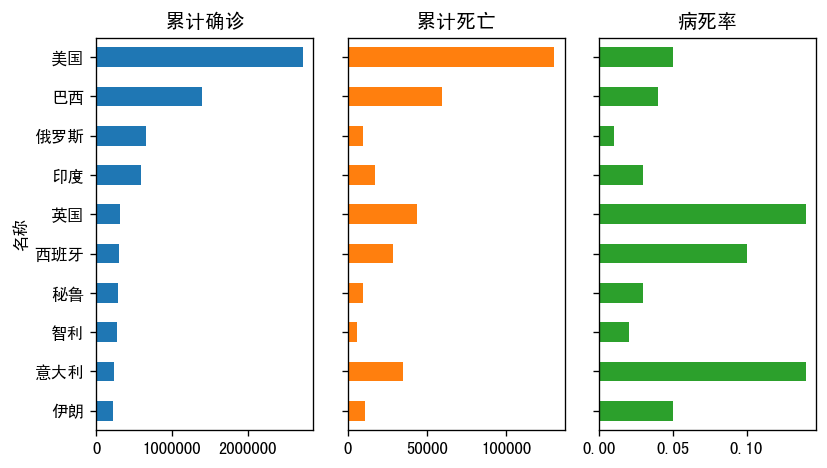

In [15]:
# 绘制条形图
world_top10.sort_values('累计确诊').plot.barh(subplots=True,layout=(1,3),sharex=False,
                                             figsize=(7,4),legend=False,sharey=True)

plt.tight_layout()   #调整子图间距
plt.show()

#### 全国各省实时数据探索性分析

下面让我们一起来分析国内的新冠肺炎疫情情况。全国各省实时数据的预处理工作与前面的流程基本一致，数据清洗之后我们将分别探索全国新增确诊top10地区，及全国现存确诊人数top10的地区

In [16]:
# 读取数据
today_province = pd.read_csv("./today_province_2020_07_01.csv")

# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似','total_input':'累计境外输入',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症',
             'total_newConfirm':'累计新增确诊','total_newDead':'累计新增死亡','total_newHeal':'累计新增治愈',}

# 更改列名
today_province.rename(columns=name_dict,inplace=True)    # inplace参数是否在原对象基础上进行修改

today_province.head()

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,累计新增确诊,累计新增死亡,累计新增治愈,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,420000,2020-07-01 00:04:02,湖北,68135,0,63623,4512,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,0
1,440000,2020-07-01 08:23:59,广东,1641,0,1627,8,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,0
2,410000,2020-07-01 00:04:01,河南,1276,0,1254,22,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,0
3,330000,2020-07-01 00:04:02,浙江,1269,0,1267,1,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,0
4,810000,2020-07-01 10:43:48,香港,1205,0,1107,7,0,0,NaN,NaN,NaN,2,NaN,2,0,NaN,0


In [17]:
# 查看数据基本信息
today_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      34 non-null     int64  
 1   更新时间    34 non-null     object 
 2   名称      34 non-null     object 
 3   累计确诊    34 non-null     int64  
 4   累计疑似    34 non-null     int64  
 5   累计治愈    34 non-null     int64  
 6   累计死亡    34 non-null     int64  
 7   累计重症    34 non-null     int64  
 8   累计境外输入  34 non-null     int64  
 9   累计新增确诊  1 non-null      float64
 10  累计新增死亡  1 non-null      float64
 11  累计新增治愈  1 non-null      float64
 12  当日新增确诊  34 non-null     int64  
 13  当日新增疑似  0 non-null      float64
 14  当日新增治愈  34 non-null     int64  
 15  当日新增死亡  34 non-null     int64  
 16  当日新增重症  0 non-null      float64
 17  当日现存确诊  34 non-null     int64  
dtypes: float64(5), int64(11), object(2)
memory usage: 4.9+ KB


使用`describe()`查看数据的统计信息：

In [18]:
# 查看数值型特征的统计量
today_province.describe()

,编号,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,累计新增确诊,累计新增死亡,累计新增治愈,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,34.000000,34.000000,34.0,34.000000,34.000000,34.0,34.0,1.0,1.0,1.0,34.000000,0.0,34.000000,34.0,0.0,34.000000
mean,422941.176471,2506.823529,0.0,2355.029412,136.705882,0.0,0.0,328.0,0.0,2.0,0.147059,NaN,0.529412,0.0,NaN,-0.294118
std,195021.823359,11604.492243,0.0,10834.152967,773.107720,0.0,0.0,NaN,NaN,NaN,0.609637,NaN,0.991946,0.0,NaN,0.938387
min,110000.000000,1.000000,0.0,1.000000,0.000000,0.0,0.0,328.0,0.0,2.0,0.000000,NaN,0.000000,0.0,NaN,-3.000000
25%,312500.000000,165.750000,0.0,156.000000,1.000000,0.0,0.0,328.0,0.0,2.0,0.000000,NaN,0.000000,0.0,NaN,0.000000
50%,425000.000000,356.000000,0.0,346.500000,3.000000,0.0,0.0,328.0,0.0,2.0,0.000000,NaN,0.000000,0.0,NaN,0.000000
75%,537500.000000,929.500000,0.0,894.500000,6.750000,0.0,0.0,328.0,0.0,2.0,0.000000,NaN,0.750000,0.0,NaN,0.000000
max,820000.000000,68135.000000,0.0,63623.000000,4512.000000,0.0,0.0,328.0,0.0,2.0,3.000000,NaN,3.000000,0.0,NaN,2.000000


我们发现，累计疑似、累计重症、当日新增疑似和当日新增重症的数据全部为0，因此我们便不予考虑

In [19]:
# 计算各省当日现存确诊人数
today_province['当日现存确诊'] = today_province['累计确诊']-today_province['累计治愈']-today_province['累计死亡']

# 将各省名称设置为索引
today_province.set_index('名称',inplace=True)

today_province.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 湖北 to 西藏
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      34 non-null     int64  
 1   更新时间    34 non-null     object 
 2   累计确诊    34 non-null     int64  
 3   累计疑似    34 non-null     int64  
 4   累计治愈    34 non-null     int64  
 5   累计死亡    34 non-null     int64  
 6   累计重症    34 non-null     int64  
 7   累计境外输入  34 non-null     int64  
 8   累计新增确诊  1 non-null      float64
 9   累计新增死亡  1 non-null      float64
 10  累计新增治愈  1 non-null      float64
 11  当日新增确诊  34 non-null     int64  
 12  当日新增疑似  0 non-null      float64
 13  当日新增治愈  34 non-null     int64  
 14  当日新增死亡  34 non-null     int64  
 15  当日新增重症  0 non-null      float64
 16  当日现存确诊  34 non-null     int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 4.8+ KB


#### 全国新增确诊top10地区

目前，我国疫情已得到很好的控制，我们现在更为关注的是新增确诊病例的地区

In [18]:
# 查看全国新增确诊top10的地区
new_top6 = today_province['当日新增确诊'].sort_values(ascending=False)[:10]

new_top6

名称
北京     3
香港     2
西藏     0
江西     0
重庆     0
四川     0
江苏     0
上海     0
山东     0
黑龙江    0
Name: 当日新增确诊, dtype: int64

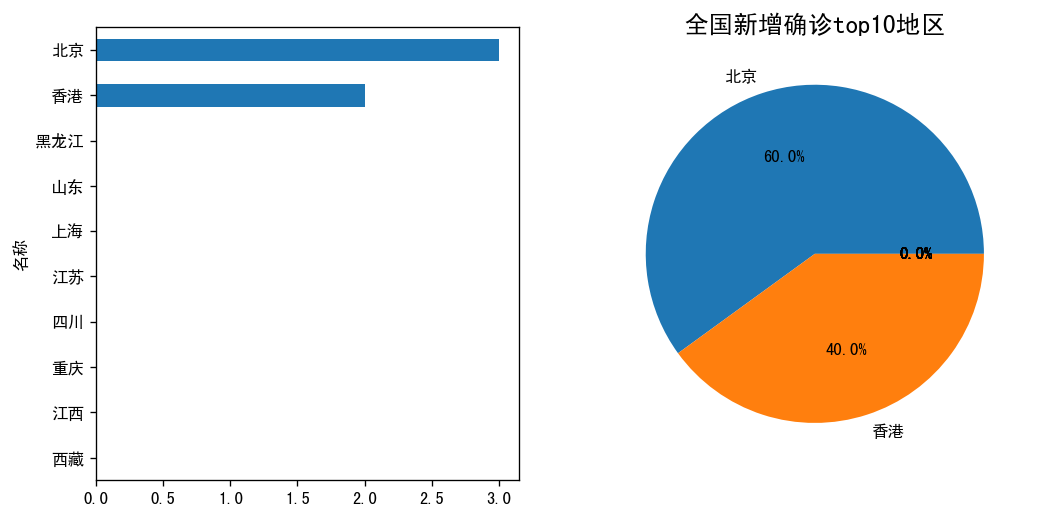

In [19]:
# 绘制条形图和饼图
fig,ax = plt.subplots(1,2,figsize=(10,5))

new_top6.sort_values(ascending=True).plot.barh(fontsize=10,ax=ax[0])
new_top6.plot.pie(autopct='%.1f%%',fontsize=10,ax=ax[1])

plt.ylabel('')
plt.title('全国新增确诊top10地区',size=15)
plt.show()

#### 全国现存确诊人数top10的地区

In [20]:
# 查看全国现存确诊人数top10的省市
store_top10 = today_province['当日现存确诊'].sort_values(ascending=False)[:10]

store_top10

名称
北京    326
香港     91
上海     28
甘肃     16
四川     12
河北      9
陕西      8
广东      6
辽宁      5
福建      3
Name: 当日现存确诊, dtype: int64

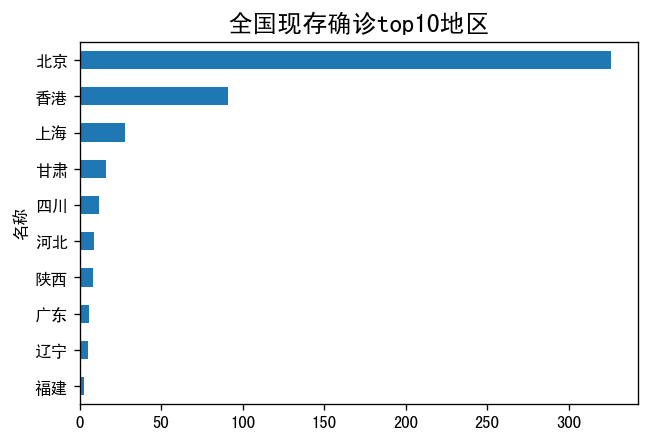

In [21]:
# 绘制条形图

store_top10.sort_values(ascending=True).plot.barh(fontsize=10)

plt.title('全国现存确诊top10地区',size=15)
plt.show()

### 历史数据探索性分析
#### 全国历史数据探索性分析

全国历史数据是时间序列的数据类型，在数据清洗的时候需要对时间进行处理。本部分的最后我们将绘制全国历史数据的折线图，并着重分析全国新增确诊人数的变化趋势

In [20]:
# 读取数据
alltime_china = pd.read_csv("./alltime_China_2020_07_01.csv")

# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡','today_input':'当日境外输入',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似','total_input':'累计境外输入',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症','total_storeConfirm':'累计现存确诊'}

# 更改列名
alltime_china.rename(columns=name_dict,inplace=True)

alltime_china.head()

,日期,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,累计现存确诊,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
0,2020-01-13,NaN,41,0,0,1,NaN,0,0,0,0,0,0,NaN,0,0
1,2020-01-14,NaN,41,0,0,1,NaN,0,0,0,0,0,0,NaN,0,0
2,2020-01-15,NaN,41,0,5,2,NaN,0,0,0,0,0,0,NaN,0,0
3,2020-01-16,NaN,45,0,8,2,NaN,0,0,0,0,0,0,NaN,0,0
4,2020-01-17,NaN,62,0,12,2,NaN,0,0,0,0,0,0,NaN,0,0


In [21]:
alltime_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      170 non-null    object 
 1   更新时间    0 non-null      float64
 2   累计确诊    170 non-null    int64  
 3   累计疑似    170 non-null    int64  
 4   累计治愈    170 non-null    int64  
 5   累计死亡    170 non-null    int64  
 6   累计重症    0 non-null      float64
 7   累计境外输入  170 non-null    int64  
 8   累计现存确诊  170 non-null    int64  
 9   当日新增确诊  170 non-null    int64  
 10  当日新增疑似  170 non-null    int64  
 11  当日新增治愈  170 non-null    int64  
 12  当日新增死亡  170 non-null    int64  
 13  当日新增重症  0 non-null      float64
 14  当日现存确诊  170 non-null    int64  
 15  当日境外输入  170 non-null    int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 21.4+ KB


In [22]:
# 查看数据的统计信息
alltime_china.describe()

,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,累计现存确诊,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
count,0.0,170.000000,170.0,170.000000,170.000000,0.0,170.000000,170.000000,170.000000,170.000000,170.0,170.0,0.0,170.0,170.000000
mean,NaN,70080.717647,0.0,56734.394118,3230.911765,NaN,926.476471,10106.076471,505.770588,577.694118,0.0,0.0,NaN,0.0,11.176471
std,NaN,27583.016701,0.0,31754.237469,1609.381784,NaN,803.868415,16625.171713,1455.420405,1315.257237,0.0,0.0,NaN,0.0,19.096563
min,NaN,41.000000,0.0,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000
25%,NaN,77881.750000,0.0,27958.500000,2679.000000,NaN,0.000000,260.500000,9.000000,1.000000,0.0,0.0,NaN,0.0,0.000000
50%,NaN,83114.000000,0.0,77518.000000,3341.000000,NaN,1012.500000,1717.000000,37.000000,5.000000,0.0,0.0,NaN,0.0,3.000000
75%,NaN,84503.750000,0.0,79713.250000,4645.000000,NaN,1707.750000,11194.750000,141.000000,122.250000,0.0,0.0,NaN,0.0,11.000000
max,NaN,85232.000000,0.0,80068.000000,4648.000000,NaN,1918.000000,58097.000000,15153.000000,5328.000000,0.0,0.0,NaN,0.0,98.000000


In [23]:
# 缺失值处理

# 计算当日现存确诊人数
alltime_china['当日现存确诊'] = alltime_china['累计确诊']-alltime_china['累计治愈']-alltime_china['累计死亡']

# 删除更新时间一列
alltime_china.drop(['更新时间','当日新增重症'],axis=1,inplace=True)

alltime_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      170 non-null    object 
 1   累计确诊    170 non-null    int64  
 2   累计疑似    170 non-null    int64  
 3   累计治愈    170 non-null    int64  
 4   累计死亡    170 non-null    int64  
 5   累计重症    0 non-null      float64
 6   累计境外输入  170 non-null    int64  
 7   累计现存确诊  170 non-null    int64  
 8   当日新增确诊  170 non-null    int64  
 9   当日新增疑似  170 non-null    int64  
 10  当日新增治愈  170 non-null    int64  
 11  当日新增死亡  170 non-null    int64  
 12  当日现存确诊  170 non-null    int64  
 13  当日境外输入  170 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 18.7+ KB


与实时数据相比，历史数据的日期一列是非常重要的。我们使用`pd.to_datetime()`将日期的数据类型设为`datetime`，并将其设置为行索引。

In [25]:
# 将日期改成datetime格式
alltime_china['日期'] = pd.to_datetime(alltime_china['日期'])

# 设置日期为索引
alltime_china.set_index('日期',inplace=True)     # 也可使用pd.read_csv("./input/alltime_China_2020_03_27.csv",parse_dates=['date'],index_col='date')

alltime_china.index

DatetimeIndex(['2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='日期', length=170, freq=None)

设置为时期索引后，数据的选取将非常便利

In [26]:
# 举例
alltime_china.loc['2020-01']

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,累计现存确诊,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日现存确诊,当日境外输入
日期,,,,,,,,,,,,,
2020-01-13,41,0,0,1,NaN,0,0,0,0,0,0,40,0
2020-01-14,41,0,0,1,NaN,0,0,0,0,0,0,40,0
2020-01-15,41,0,5,2,NaN,0,0,0,0,0,0,34,0
2020-01-16,45,0,8,2,NaN,0,0,0,0,0,0,35,0
2020-01-17,62,0,12,2,NaN,0,0,0,0,0,0,48,0
2020-01-18,198,0,17,3,NaN,0,0,0,0,0,0,178,0
2020-01-19,275,0,18,4,NaN,0,0,0,0,0,0,253,0
2020-01-20,291,0,25,6,NaN,0,291,77,27,0,0,260,0
2020-01-21,440,0,25,9,NaN,0,431,149,53,0,0,406,0


数据清洗之后，我们将绘制折线图查看新冠肺炎数据的变化趋势：

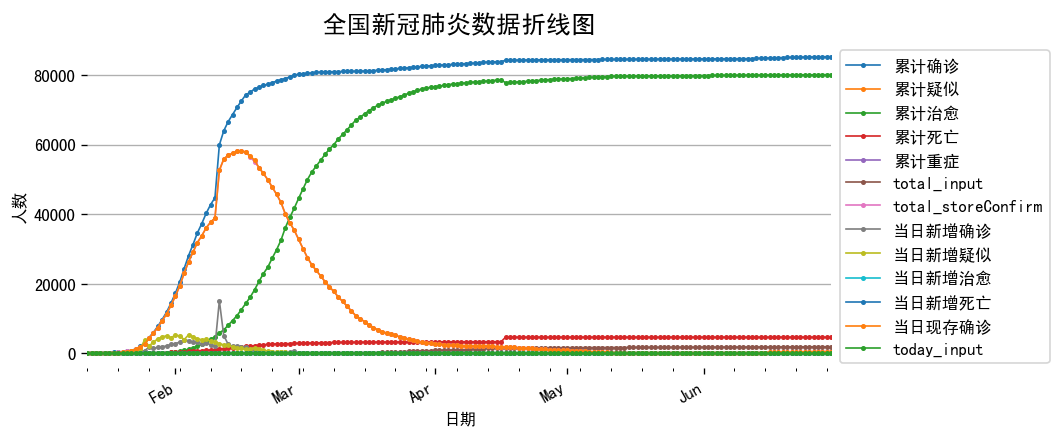

In [28]:
# 时间序列数据绘制折线图
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import datetime

fig, ax = plt.subplots(figsize=(8,4))

alltime_china.plot(marker='o',ms=2,lw=1,ax=ax)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

# 图例位置调整
plt.legend(bbox_to_anchor = [1,1])

plt.title('全国新冠肺炎数据折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.show()

由图可知，我国累计确诊人数在2月中旬已达到拐点，现存确诊人数也已从2月15日起逐步减少。同时，累计治愈人数稳步上升，且随现存确诊人数的下降而逐渐趋于平缓状态。由于新增确诊等字段数值相对较小，我们单独进行分析

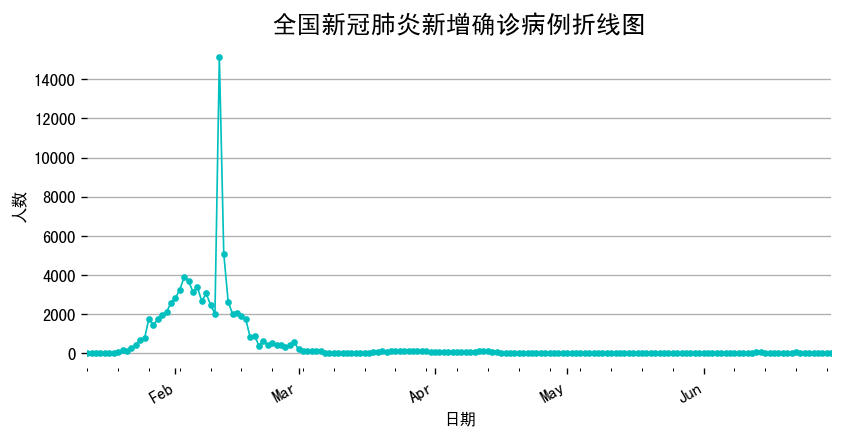

In [29]:
# 时间序列数据绘制折线图
fig, ax = plt.subplots(figsize=(8,4))

alltime_china['当日新增确诊'].plot(ax=ax, style='-',lw=1,color='c',marker='o',ms=3)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

plt.title('全国新冠肺炎新增确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.show()

可以看到2月12日新增病例大幅上升，这是什么原因呢？如果你非常关注疫情，应该知道这是因为在当天国家卫健委调整了确诊的标准。此前，患者是否确诊，主要参考指标是核酸检测结果，还需要结合CT影像，咳嗽等症状来综合判断。随着疫情防控深入，临床数据的不断累积，有个新情况逐渐凸显出来——由于核酸检测的时间较慢，一些患者无法确诊收治，但是病症的临床表现又高度疑似新冠肺炎。如果不改变认定标准，这部分患者就难以得到有效救助，对整个疫情防控也造成负面影响。这次主要变化，就是将临床诊断纳入确诊范围。

#### 世界各国历史数据探索性分析

最后让我们一起来分析一下世界各国历史数据，由于数据表中每个国家含有多条数据，我们需要借助GroupBy技术对数据进行分组，并通过层次化索引操作选取多个国家的累计确诊和新增确诊数据，来查看各国疫情变化趋势。

In [39]:
# 读取数据
alltime_world = pd.read_csv("./alltime_world_2020_07_01.csv")

# 创建中文列名字典
name_dict = {'name':'名称','date':'日期','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡','today_input':'当日境外输入',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似','total_input':'累计境外输入',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}

# 更改列名
alltime_world.rename(columns=name_dict,inplace=True)

alltime_world.head()

,日期,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入,名称
0,2020-03-03,1,0,0,0,0,0,1,0.0,0,0,NaN,NaN,NaN,突尼斯
1,2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,NaN,0.0,突尼斯
2,2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,NaN,0.0,突尼斯
3,2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,NaN,0.0,突尼斯
4,2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,NaN,0.0,突尼斯


In [40]:
# 查看数据基本信息
alltime_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17352 entries, 0 to 17351
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      17352 non-null  object 
 1   累计确诊    17352 non-null  int64  
 2   累计疑似    17352 non-null  int64  
 3   累计治愈    17352 non-null  int64  
 4   累计死亡    17352 non-null  int64  
 5   累计重症    17352 non-null  int64  
 6   累计境外输入  17352 non-null  int64  
 7   当日新增确诊  17352 non-null  int64  
 8   当日新增疑似  12907 non-null  float64
 9   当日新增治愈  17352 non-null  int64  
 10  当日新增死亡  17352 non-null  int64  
 11  当日新增重症  12507 non-null  float64
 12  当日现存确诊  0 non-null      float64
 13  当日境外输入  17156 non-null  float64
 14  名称      17352 non-null  object 
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


In [41]:
alltime_world.describe()

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
count,1.735200e+04,17352.000000,1.735200e+04,17352.000000,17352.000000,17352.000000,17352.000000,12907.000000,17352.000000,17352.000000,12507.000000,0.0,17156.000000
mean,2.650773e+04,15.784002,1.153927e+04,1557.107653,6.376268,8.636123,613.528527,3.528860,337.117335,29.664650,-0.581434,NaN,0.111798
std,1.314654e+05,526.467950,5.347891e+04,7855.523367,169.611760,119.488943,2926.915946,95.683879,4212.200126,157.582941,12.373084,NaN,5.791246
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-37895.000000,0.000000,-344468.000000,-1915.000000,-464.000000,NaN,-19.000000
25%,1.520000e+02,0.000000,1.800000e+01,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,1.111000e+03,0.000000,2.980000e+02,21.000000,0.000000,0.000000,26.000000,0.000000,3.000000,0.000000,0.000000,NaN,0.000000
75%,8.303750e+03,0.000000,2.497500e+03,200.000000,0.000000,0.000000,200.000000,0.000000,57.000000,5.000000,0.000000,NaN,0.000000
max,2.727853e+06,28942.000000,1.143334e+06,130122.000000,7365.000000,1918.000000,90776.000000,4008.000000,349681.000000,4856.000000,0.000000,NaN,723.000000


数据预处理操作与前面的方法基本一致：

In [42]:
# 将日期一列数据类型变为datetime
alltime_world['日期'] = pd.to_datetime(alltime_world['日期'])

# 计算当日现存确诊
alltime_world['当日现存确诊'] = alltime_world['累计确诊']-alltime_world['累计治愈']-alltime_world['累计死亡']

alltime_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17352 entries, 0 to 17351
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      17352 non-null  datetime64[ns]
 1   累计确诊    17352 non-null  int64         
 2   累计疑似    17352 non-null  int64         
 3   累计治愈    17352 non-null  int64         
 4   累计死亡    17352 non-null  int64         
 5   累计重症    17352 non-null  int64         
 6   累计境外输入  17352 non-null  int64         
 7   当日新增确诊  17352 non-null  int64         
 8   当日新增疑似  12907 non-null  float64       
 9   当日新增治愈  17352 non-null  int64         
 10  当日新增死亡  17352 non-null  int64         
 11  当日新增重症  12507 non-null  float64       
 12  当日现存确诊  17352 non-null  int64         
 13  当日境外输入  17156 non-null  float64       
 14  名称      17352 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(10), object(1)
memory usage: 2.0+ MB


数据表中总共有哪些国家呢？我们可以使用unique()查看数据中的唯一值：

In [43]:
# 查看唯一值,可使用len()查看个数
alltime_world['名称'].unique()

array(['突尼斯', '塞尔维亚', '中国', '日本', '泰国', '新加坡', '韩国', '澳大利亚', '德国', '美国',
       '马来西亚', '越南', '圣巴泰勒米', '肯尼亚', '伊朗', '以色列', '毛利亚尼亚', '黎巴嫩', '克罗地亚',
       '奥地利', '瑞士', '希腊', '毛里求斯', '爱沙尼亚', '北马其顿', '白俄罗斯', '立陶宛', '阿塞拜疆',
       '美属维尔京群岛', '蒙古', '乌克兰', '波兰', '波黑', '蒙特塞拉特', '南非', '布隆迪', '南苏丹',
       '马耳他', '摩尔多瓦', '保加利亚', '孟加拉', '阿尔巴尼亚', '巴勒斯坦', '科摩罗', '阿富汗',
       '沙特阿拉伯', '新西兰', '塔吉克斯坦', '泽西岛', '叙利亚', '巴拿马', '古巴', '尼日利亚', '摩洛哥',
       '塞内加尔', '老挝', '巴哈马', '马约特岛', '斯洛文尼亚', '卢森堡', '爱尔兰', '厄瓜多尔', '捷克',
       '匈牙利', '法属圭亚那', '多哥共和国', '哥斯达黎加', '文莱', '法罗群岛', '马提尼克岛', '荷兰',
       '巴西', '洪都拉斯', '乌拉圭', '秘鲁', '智利', '格陵兰', '圣巴托洛谬岛', '马尔代夫', '委内瑞拉',
       '毛里塔尼亚', '纳米比亚', '法属留尼汪岛', '波多黎各', '加纳', '赤道几内亚', '几内亚', '卢旺达',
       '格林纳达', '斯威士兰', '坦桑尼亚', '贝宁', '刚果（金）', '中非共和国', '利比里亚', '索马里',
       '塞拉利昂', '乍得', '赞比亚', '巴巴多斯', '马里', '阿根廷', '法属波利尼西亚', '巴林', '莫桑比克',
       '喀麦隆', '乌干达', '厄立特里亚', '刚果（布）', '津巴布韦', '丹麦', '阿鲁巴', '斐济', '伯利兹',
       '缅甸', '塞浦路斯', '关岛', '科索沃', '圣皮埃尔岛和密克隆岛', '吉尔吉斯斯坦', '博茨瓦

同时我们还想了解随着时间的变化，每天有多少国家出现新冠肺炎疫情，`value_counts()`函数可帮助我们查看每一天记录了多少数据。

In [44]:
# 统计每天有多少国家出现疫情
alltime_world['日期'].value_counts().head(20)

2020-06-08    207
2020-05-27    207
2020-05-24    207
2020-05-30    206
2020-06-10    206
2020-05-31    206
2020-06-11    206
2020-06-01    206
2020-06-05    206
2020-05-12    205
2020-05-26    205
2020-05-14    205
2020-05-19    205
2020-06-03    205
2020-06-06    204
2020-06-04    204
2020-05-20    204
2020-05-25    204
2020-05-18    203
2020-04-21    202
Name: 日期, dtype: int64

#### 选取多国数据

接下来，我们想提取中国、日本、韩国、美国、意大利、英国、西班牙和德国的数据，探索这八个国家的累计确诊和新增确诊病例的变化趋势。我们将使用GroupBy技术和层次化索引操作。GroupBy技术是对数据进行分组计算并将各组计算结果合并的一项技术，包括如下三个过程：

<img src='http://cookdata.cn/media/note_images/groupby技术_1585496694168_5d14.jpg' style='max-width:40%;'>

想要提取多个国家的数据，就需要把国家一列也设置为索引，我们可以使用`groupby()`函数根据日期和名称两列进行分组，将数据转为层次化索引。

In [45]:
# groupby创建层次化索引
data = alltime_world.groupby(['日期','名称']).mean()

data.head()

,,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
日期,名称,,,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,0,1,0.0,0,0,NaN,1,NaN
2020-01-21,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-22,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-23,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-24,韩国,2,0,0,0,0,0,1,0.0,0,0,NaN,2,0.0


想要提取部分数据，同样可以使用`.loc`方法，需先通过`.loc(axis= )`指定对行索引还是对列索引进行操作。比如，我们想提取中国、韩国、美国、意大利、英国、西班牙、德国的数据：

In [46]:
# 提取部分数据
data_part = data.loc(axis=0)[:,['中国','日本','韩国','美国','意大利','英国','西班牙','德国']]

data_part.head()

,,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
日期,名称,,,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,0,1,0.0,0,0,NaN,1,NaN
2020-01-21,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-22,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-23,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-24,韩国,2,0,0,0,0,0,1,0.0,0,0,NaN,2,0.0


此时，多级索引已设置成功。如果我们想将其还原则可使用`reset_index()`函数。

In [47]:
# 将层级索引还原
data_part.reset_index('名称',inplace=True)

data_part.head()

,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计境外输入,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,当日境外输入
日期,,,,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,0,1,0.0,0,0,NaN,1,NaN
2020-01-21,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-22,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-23,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-24,韩国,2,0,0,0,0,0,1,0.0,0,0,NaN,2,0.0


#### 绘制多个国家的累计确诊人数折线图

NameError: name 'dates' is not defined

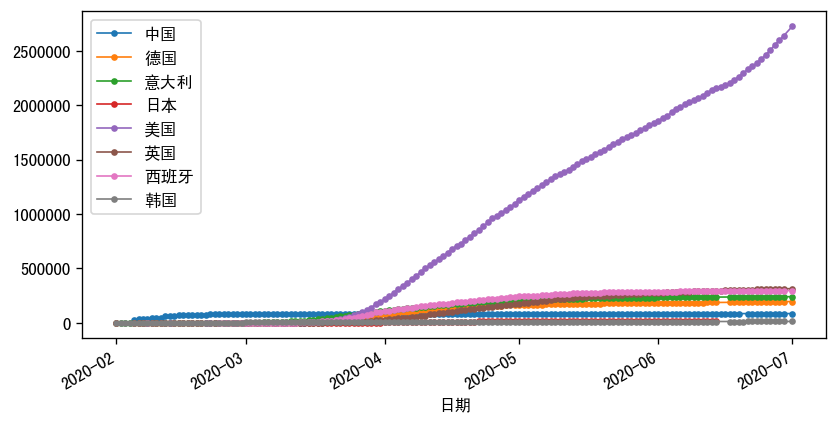

In [49]:
# 绘制多个国家的累计确诊人数折线图
fig, ax = plt.subplots(figsize=(8,4))

data_part['2020-02':].groupby('名称')['累计确诊'].plot(legend=True,marker='o',ms=3,lw=1)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

plt.title('各国新冠肺炎累计确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])
plt.show()